# Regresión logística para predicciones bancarias

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
#data = pd.read_csv("../datasets/bank/bank.csv", sep=";")
mainpath="D:\Documents\DATA SCIENCE\python-ml-course-master\datasets"
filename="bank/bank.csv"
fullpath=os.path.join(mainpath, filename)
data=pd.read_csv(fullpath,sep=";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [5]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [6]:
data.shape

(4119, 21)

In [7]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [8]:
#convierte los valores de si y no en 0 y 1
data["y"] = (data["y"]=="yes").astype(int)

In [9]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0


In [10]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [11]:
#el np.where es como la consulta que se hace a base de datos. en esta parte se hace limpieza de datos y se organizan minusculas y mayusculas

data["education"] = np.where(data["education"]=="basic.4y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.6y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.9y", "Basic", data["education"])

data["education"] = np.where(data["education"]=="high.school", "High School", data["education"])
data["education"] = np.where(data["education"]=="professional.course", "Professional Course", data["education"])
data["education"] = np.where(data["education"]=="university.degree", "University Degree", data["education"])

data["education"] = np.where(data["education"]=="illiterate", "Illiterate", data["education"])
data["education"] = np.where(data["education"]=="unknown", "Unknown", data["education"])

In [12]:
data["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [13]:
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [14]:
data.groupby("y").mean()

C:\Users\User\AppData\Local\Temp\ipykernel_18884\3574081688.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("y").mean()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [15]:
data.groupby("education").mean()

C:\Users\User\AppData\Local\Temp\ipykernel_18884\3637113592.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("education").mean()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0, 0.5, 'Frecuencia de compra del producto')

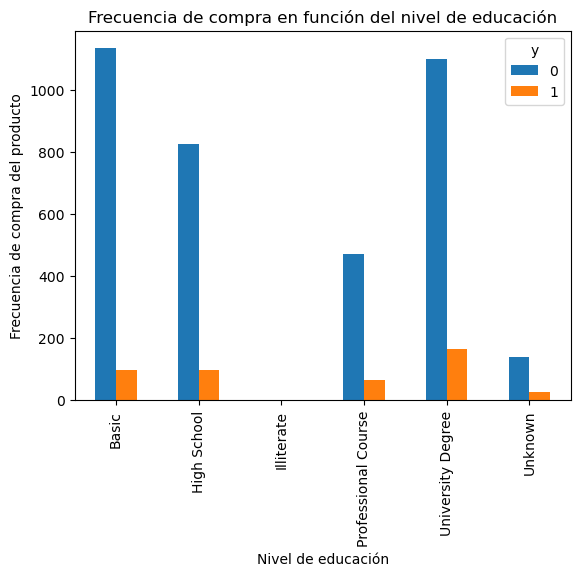

In [16]:
%matplotlib inline
pd.crosstab(data.education, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del nivel de educación")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Proporción de clientes')

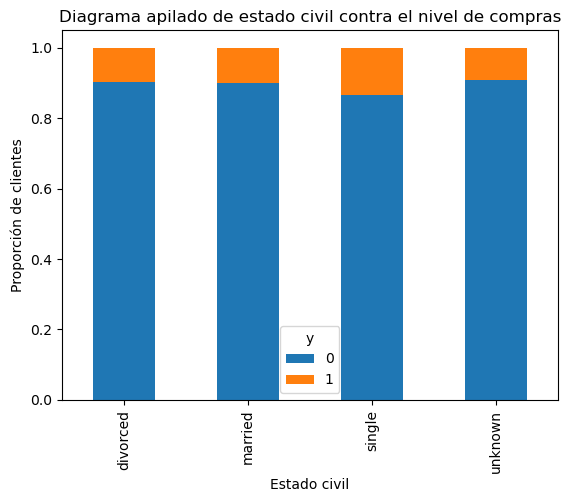

In [17]:
table=pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Diagrama apilado de estado civil contra el nivel de compras")
plt.xlabel("Estado civil")
plt.ylabel("Proporción de clientes")

Text(0, 0.5, 'Frecuencia de compra del producto')

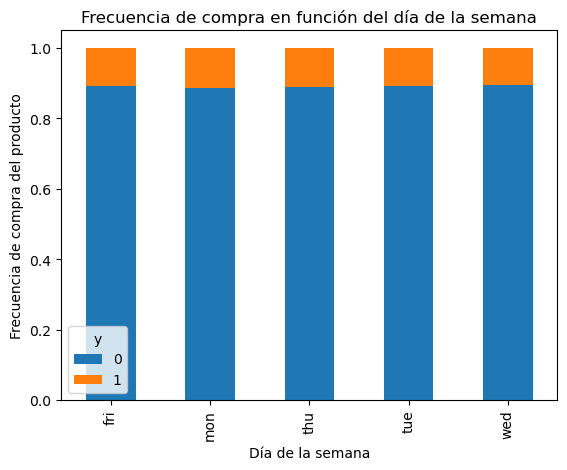

In [18]:
%matplotlib inline
table= pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en función del día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Frecuencia de compra del producto')

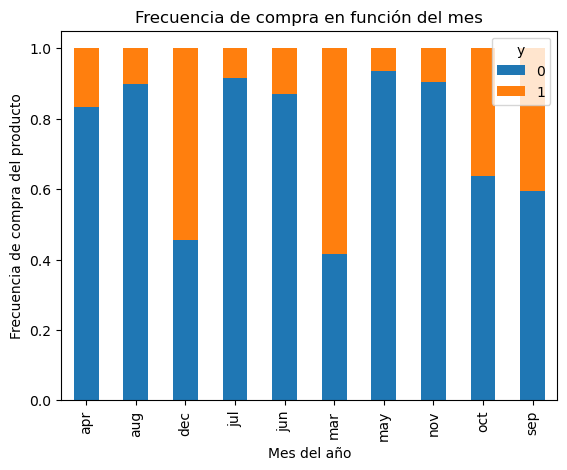

In [19]:
%matplotlib inline
table= pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Frecuencia de compra del producto')

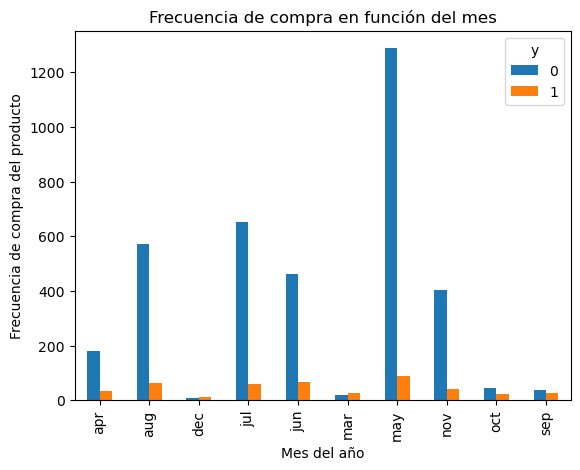

In [20]:
%matplotlib inline
table.plot(kind="bar", stacked=False)
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Cliente')

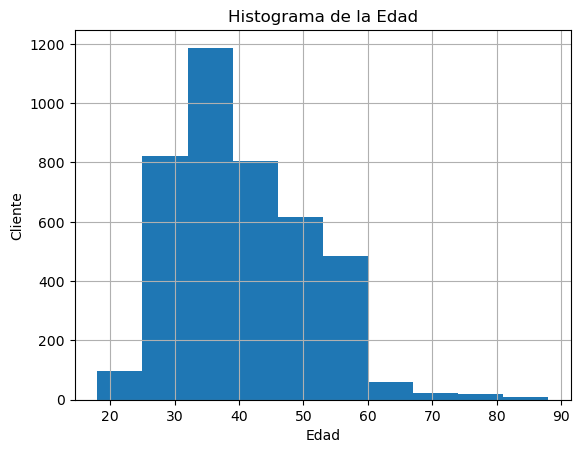

In [21]:
%matplotlib inline
data.age.hist()
plt.title("Histograma de la Edad")
plt.xlabel("Edad")
plt.ylabel("Cliente")

<Axes: xlabel='age'>

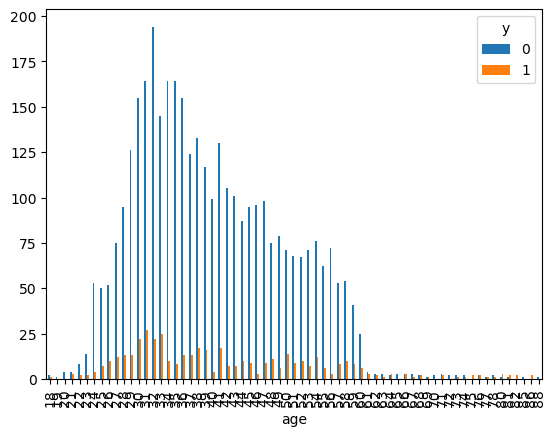

In [22]:
pd.crosstab(data.age, data.y).plot(kind="bar")

<Axes: xlabel='poutcome'>

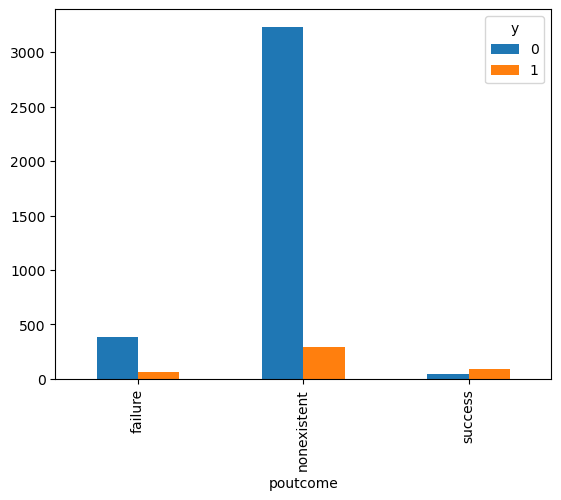

In [23]:
pd.crosstab(data.poutcome, data.y).plot(kind="bar")

### Conversión de las variables categóricas a dummies

In [24]:
categories = ["job", "marital", "education", "housing", "loan", "contact", 
              "month", "day_of_week", "poutcome"]
for category in categories:
    cat_list = "cat"+ "_"+category
    cat_dummies = pd.get_dummies(data[category], prefix=category)
    data_new = data.join(cat_dummies)
    data = data_new

In [25]:
data_vars = data.columns.values.tolist()

In [26]:
to_keep = [v for v in data_vars if v not in categories]
to_keep = [v for v in to_keep if v not in ["default"]]

In [27]:
bank_data = data[to_keep]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'd

In [28]:
bank_data_vars = bank_data.columns.values.tolist()
Y = ['y']
X = [v for v in bank_data_vars if v not in Y]

### Selección de rasgos para el modelo

In [29]:
n = 12

In [30]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression 

In [31]:
#Se crea el modelo
lr = LogisticRegression()

In [32]:
#El Recursive Feature Elimination (RFE) es una técnica de selección de características en el aprendizaje automático
rfe = RFE(lr, n_features_to_select=12)#Se eliminan las caracteristicas que no son deintees dejando solo en den modelo de regresion 12 
rfe = rfe.fit(bank_data[X], bank_data[Y].values.ravel())#Entrenamiento del modelo

c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [33]:
print(rfe.support_)# con esto optemos las caracteirsticas mas importantes del modelo 

[False False False False  True False False False  True False False False
 False False False  True False False False  True  True False False False
 False False False False False False False False False False False False
 False False False False False False  True  True  True  True  True False
 False False False False False False False  True False  True]


In [34]:
print(rfe.ranking_) #validar las caraceristeicas en orden de relevancia

[38 37 18 45  1 17 25 22  1 34  2  8  5 39  7  1  6 24 43  1  1 41 15 29
 30 47 33 12 46 19 27  4  9 14 44 13 20 32 11  3 36 21  1  1  1  1  1 23
 40 42 28 26 31 35 10  1 16  1]


In [35]:
z=zip(bank_data_vars,rfe.support_, rfe.ranking_)#pone la informacion delas variables,las que fueron seleccionadas y el ranking

In [36]:
list(z)

[('age', False, 38),
 ('duration', False, 37),
 ('campaign', False, 18),
 ('pdays', False, 45),
 ('previous', True, 1),
 ('emp.var.rate', False, 17),
 ('cons.price.idx', False, 25),
 ('cons.conf.idx', False, 22),
 ('euribor3m', True, 1),
 ('nr.employed', False, 34),
 ('y', False, 2),
 ('job_admin.', False, 8),
 ('job_blue-collar', False, 5),
 ('job_entrepreneur', False, 39),
 ('job_housemaid', False, 7),
 ('job_management', True, 1),
 ('job_retired', False, 6),
 ('job_self-employed', False, 24),
 ('job_services', False, 43),
 ('job_student', True, 1),
 ('job_technician', True, 1),
 ('job_unemployed', False, 41),
 ('job_unknown', False, 15),
 ('marital_divorced', False, 29),
 ('marital_married', False, 30),
 ('marital_single', False, 47),
 ('marital_unknown', False, 33),
 ('education_Basic', False, 12),
 ('education_High School', False, 46),
 ('education_Illiterate', False, 19),
 ('education_Professional Course', False, 27),
 ('education_University Degree', False, 4),
 ('education_Unkno

In [37]:
#Se seleccionan las variables categoricas encontradas para la implementacion del  modelo
cols = ["previous", "euribor3m", "job_blue-collar", "job_retired", "month_aug", "month_dec", 
        "month_jul", "month_jun", "month_mar", "month_nov", "day_of_week_wed", "poutcome_nonexistent"]

In [38]:
X = bank_data[cols]
Y = bank_data["y"]

### Implementación del modelo en Python con statsmodel.api

In [39]:
import statsmodels.api as sm

In [40]:
logit_model = sm.Logit(Y, X)

In [41]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.291770
         Iterations 7


In [42]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Method:            MLE       
Dependent Variable:   y                 Pseudo R-squared:  0.155     
Date:                 2023-09-23 10:15  AIC:               2427.6025 
No. Observations:     4119              BIC:               2503.4828 
Df Model:             11                Log-Likelihood:    -1201.8   
Df Residuals:         4107              LL-Null:           -1422.9   
Converged:            1.0000            LLR p-value:       6.4492e-88
No. Iterations:       7.0000            Scale:             1.0000    
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
previous             -0.1229   0.0700  -1.7545 0.0793 -0.2601  0.0144
euribor3m            -0.6049   0.0383 -15.7882 0.0000 -0.6800 -0.5298
job_blue-collar      -0.5032   0.1519  -3.3136 0.0009 -0.8009 -0.2056
job_retired           0.2235   0.2191   1.0205 0.3075 -0.2058  0.6529
month_aug             0.6048   0.1759   3.4374 0.0006  0.2600  0.9497
month_dec             1.1358   0.4493   2.5281 0.0115  0.2552  2.0163
month_jul             1.0327   0.1910   5.4071 0.0000  0.6584  1.4070
month_jun             1.0775   0.1752   6.1493 0.0000  0.7341  1.4210
month_mar             1.6448   0.3139   5.2407 0.0000  1.0297  2.2600
month_nov             0.3828   0.1950   1.9634 0.0496  0.0007  0.7649
day_of_week_wed      -0.0649   0.1391  -0.4665 0.6409 -0.3375  0.2077
poutcome_nonexistent -0.7753   0.1221  -6.3492 0.0000 -1.0147 -0.5360
=====================================================================

"""

### Implementación del modelo en Python con scikit-learn

In [43]:
from sklearn import linear_model

In [44]:
#creacion y entrenamiento del modelo
logit_model = linear_model.LogisticRegression()
logit_model.fit(X,Y)

LogisticRegression()

In [45]:
#Rendimiento del modelo
logit_model.score(X,Y)

0.8958485069191552

In [46]:
1-Y.mean()

0.8905074047098811

In [47]:
#
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))

,0,1
0,previous,[0.5362541179380887]
1,euribor3m,[-0.544367039799497]
2,job_blue-collar,[-0.3533138743515035]
3,job_retired,[0.36165159081190673]
4,month_aug,[0.6292588895060598]
5,month_dec,[1.1943974572119247]
6,month_jul,[0.9630554140656787]
7,month_jun,[1.0566897056467324]
8,month_mar,[1.6386680234587736]
9,month_nov,[0.45770841910578497]


## Validación del modelo logístico
Los metodos de validacion cruzada tambien se usan como clasificadores

Para la validacion del modelo se usan los cross valition, estos utilizan muestreos aleatorios, y algunos son iterativos k veces 
lo que permite evitar el problema del overfit

Leave  one out Cross validation(LOOCV) Permite tener mayor precision pero tiene mayor tiempo de computo

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=0)

In [50]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression()

In [51]:
from IPython.display import display, Math, Latex

In [52]:
display(Math(r'Y_p=\begin{cases}0& si\ p\leq0.5\\1&si\ p >0.5\end{cases}'))

<IPython.core.display.Math object>

In [53]:
#Probabilidad de acertar en cada prediccion
probs = lm.predict_proba(X_test)

In [54]:
probs

array([[0.95409621, 0.04590379],
       [0.83896646, 0.16103354],
       [0.93216535, 0.06783465],
       ...,
       [0.65098445, 0.34901555],
       [0.97381005, 0.02618995],
       [0.57635748, 0.42364252]])

In [55]:
prediction = lm.predict(X_test)

In [56]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
display(Math(r'\varepsilon\in (0,1), Y_p=\begin{cases}0& si\ p\leq \varepsilon\\1&si\ p >\varepsilon\end{cases}'))

<IPython.core.display.Math object>

In [58]:
#NOta: en el caso siguiente se modifica para que un un 10% de probilidad se clasifique como verdadera
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1 # El threshold se genera para darle el rango de probabilidad que se necesita para que una prediccion sea aceptada como verdadera o falsa
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
prob_df.head()

,0,prediction
0,0.045904,0
1,0.161034,1
2,0.067835,0
3,0.062222,0
4,0.042308,0


In [59]:
#El crosstab sirve para poner el numero de predicciones que fueron acertadas
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,846
1,390


In [60]:
390/len(prob_df)*100

31.55339805825243

In [61]:
threshold = 0.15
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,915
1,321


In [62]:
331/len(prob_df)*100

26.779935275080906

In [63]:
threshold = 0.05
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,504
1,732


In [64]:
732/len(prob_df)*100

59.22330097087378

In [65]:
from sklearn import metrics

In [66]:
metrics.accuracy_score(Y_test, prediction)

0.901294498381877

## Validación cruzada
La validacion cruzada utiliza un muestreo aleatorio k veces para comprobar que no se generen problemas de over fit
La validación cruzada ramdom tambien se hace de manera aletoria.
La validacioon cruzada leave one out cross validation (LOOCV) Tiene mayor precision pero mayor tiempo de computo
 

In [67]:
from sklearn.model_selection import cross_val_score

In [68]:
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring="accuracy", cv=10)

In [69]:
scores

array([0.90533981, 0.88834951, 0.90533981, 0.89563107, 0.90048544,
       0.8907767 , 0.88349515, 0.89320388, 0.89320388, 0.88807786])

In [70]:
scores.mean()

0.8943903101599225

## Matrices de Confusión y curvas ROC
Las matrices de confucion y las curvas de ROC se usan par comprobar la eficacio del modelo para predecir la salida



In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

In [72]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression()

In [73]:
probs = lm.predict_proba(X_test)

In [74]:
prob=probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0]>=threshold, 1, 0)
prob_df["actual"] = list(Y_test)
prob_df.head()

,0,prediction,actual
0,0.045904,0,0
1,0.161034,1,0
2,0.067835,0,0
3,0.062222,0,0
4,0.042308,0,0


In [75]:
confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)

In [76]:
TN=confusion_matrix[0][0]
TP=confusion_matrix[1][1]
FN=confusion_matrix[0][1]
FP=confusion_matrix[1][0]

In [77]:
sens = TP/(TP+FN)
sens

0.21025641025641026

In [78]:
espc_1 = 1-TN/(TN+FP)
espc_1

0.047281323877068515

In [79]:
thresholds = [0.04, 0.05, 0.07, 0.10, 0.12, 0.15, 0.18, 0.20, 0.25, 0.3, 0.4, 0.5]
sensitivities = [1]
especifities_1 = [1]

for t in thresholds:
    prob_df["prediction"] = np.where(prob_df[0]>=t, 1, 0)
    prob_df["actual"] = list(Y_test)
    prob_df.head()

    confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
    TN=confusion_matrix[0][0]
    TP=confusion_matrix[1][1]
    FP=confusion_matrix[0][1]
    FN=confusion_matrix[1][0]
    
    sens = TP/(TP+FN)
    sensitivities.append(sens)
    espc_1 = 1-TN/(TN+FP)
    especifities_1.append(espc_1)

sensitivities.append(0)
especifities_1.append(0)

In [80]:
sensitivities

[1,
 0.9344262295081968,
 0.8442622950819673,
 0.680327868852459,
 0.6721311475409836,
 0.6639344262295082,
 0.6229508196721312,
 0.5163934426229508,
 0.45081967213114754,
 0.4016393442622951,
 0.36065573770491804,
 0.1721311475409836,
 0.12295081967213115,
 0]

In [81]:
especifities_1

[1,
 0.7800718132854578,
 0.5646319569120287,
 0.2989228007181328,
 0.2764811490125674,
 0.24596050269299818,
 0.21992818671454217,
 0.12387791741472176,
 0.08617594254937166,
 0.07181328545780974,
 0.06463195691202872,
 0.022441651705565557,
 0.013464991023339312,
 0]

In [82]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Curva ROC')

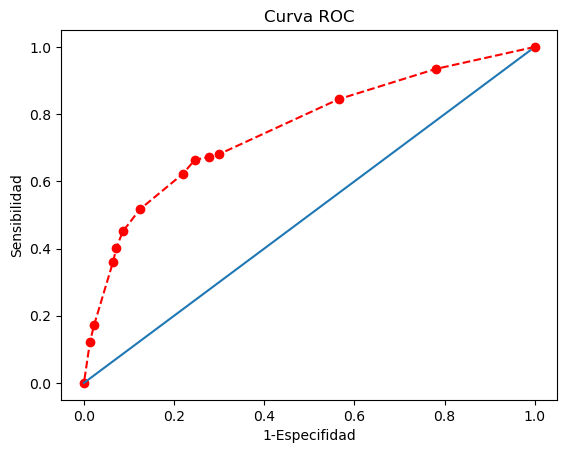

In [83]:
%matplotlib inline
plt.plot(especifities_1, sensitivities, marker="o", linestyle="--", color="r")
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1-Especifidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")

In [84]:
#HAY QUE ESPERAR QUE ACTUALICE GGPLOT LAS LIBRERIAS, SINO HAY QUE MODIFICAR ARCHIVOS INTERNOS

In [85]:
from sklearn import metrics
from pandas import Timestamp
from ggplot import *

ModuleNotFoundError: No module named 'ggplot'

In [ ]:
espc_1, sensit, _ = metrics.roc_curve(Y_test, prob)

In [ ]:
df = pd.DataFrame({
    "esp":espc_1,
    "sens":sensit
})

NameError: name 'sensit' is not defined

In [ ]:
df.head()

NameError: name 'df' is not defined

In [ ]:
ggplot(df, aes(x="esp", y="sens")) +geom_line() + geom_abline(linetype="dashed")+xlim(-0.01,1.01)+ylim(-0.01,1.01)+xlab("1-Especifidad")+ylab("Sensibilidad")

NameError: name 'ggplot' is not defined

In [ ]:
auc = metrics.auc(espc_1, sensit)
auc

NameError: name 'sensit' is not defined

In [ ]:
ggplot(df, aes(x="esp", y="sens")) + geom_area(alpha=0.25)+geom_line(aes(y="sens"))+ggtitle("Curva ROC y AUC=%s"%str(auc))

NameError: name 'ggplot' is not defined